### Geo Foundation Model
https://arxiv.org/pdf/2302.04476

For pretraining, we employ 8 NVIDIA V100 GPUs with
a batch size of 2048 (128 per GPU) and the image size
of 192×192. All pretraining settings are the same as in
[43]. For downstream tasks, 4 NVIDIA A10G GPUs are
employed. During the pretraining stage, we utilize RGB
bands as they are most commonly available among data
sources and tasks.

### nb by looking for maximum in submission file i found that there are 1540x1540 tiles

In [1]:
import os

os.listdir('.')

['venv',
 'playground.ipynb',
 'checkpoints',
 'submission_csvs',
 'simmim_pretrain']

In [3]:
import torch

# Path to your gfm.pth model
model_path = 'simmim_pretrain/gfm.pth'  # Replace with the actual path

try:
    # Attempt to load the entire model
    # Use 'cuda' if GPU is available
    model = torch.load(model_path, map_location='cpu')
    print("Model loaded successfully!")
    print(model)
except Exception as e:
    print(f"Failed to load model: {e}")

/tmp/ipykernel_256316/3433952129.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location='cpu')


Model loaded successfully!
{'model': OrderedDict([('encoder.mask_token', tensor([[[-2.3668e-03,  1.0582e-02, -6.9941e-02,  2.1643e-02, -3.3950e-03,
          -4.1248e-03, -1.0144e-02, -4.9940e-02, -1.4447e-02, -2.6239e-03,
           1.5437e-02,  1.4809e-02, -5.3602e-04, -1.2656e-02,  1.3639e-03,
           4.0834e-02,  1.9685e-03, -1.9393e-02, -5.7717e-03, -3.1889e-03,
          -6.0664e-03, -2.3177e-02,  2.9838e-03, -3.9840e-02, -2.3285e-03,
          -5.4359e-02, -2.3110e-03, -8.4289e-04, -2.2242e-02, -6.6830e-03,
           5.4010e-02, -1.5667e-01, -1.0242e-02,  2.1007e-02, -2.1121e-03,
          -3.9706e-03, -6.0322e-02, -4.7042e-02, -3.0999e-02,  1.5569e-02,
          -1.5720e-02,  2.7449e-03, -3.3824e-03,  8.8530e-05, -2.9938e-03,
          -3.2759e-02, -1.9999e-02, -6.5923e-03,  4.6992e-02,  1.6170e-02,
           6.3380e-02,  1.5680e-02, -7.1273e-02, -2.0886e-02,  3.0752e-02,
          -1.1994e-03, -2.1192e-02, -2.1424e-03, -5.1175e-03,  1.2054e-03,
           3.8877e-04,  4.7

In [10]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import timm  # PyTorch Image Models library

# Step 1: Instantiate the Swin Transformer model
model = timm.create_model(
    'swin_base_patch4_window7_224',  # Base model; adjust if necessary
    pretrained=False,
    num_classes=0  # Set to 0 for feature extraction; adjust as needed
)

# Step 2: Load the checkpoint
model_path = 'simmim_pretrain/gfm.pth'  # Replace with the actual path
checkpoint = torch.load(model_path, map_location='cpu')
print("Checkpoint keys:", checkpoint.keys())

# Step 3: Extract and clean the state dictionary
state_dict = checkpoint['model']
new_state_dict = {}
for k, v in state_dict.items():
    if k.startswith('module.'):
        new_state_dict[k[len('module.'):]] = v
    else:
        new_state_dict[k] = v

# Step 4: Load the state dictionary into the model
# Use strict=True if you are sure of the match
model.load_state_dict(new_state_dict, strict=False)
model.eval()

# Step 5: Prepare a random image tensor
batch_size = 1
channels = 3
height = 192  # Match pretraining image size
width = 192   # Match pretraining image size

random_image = torch.randn(batch_size, channels, height, width)

# Optional: Apply normalization
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
random_image = normalize(random_image)

# Step 6: Perform a forward pass
with torch.no_grad():
    output = model(random_image)

print("Model Output:", output)

/tmp/ipykernel_256316/811779125.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location='cpu')


Checkpoint keys: dict_keys(['model', 'optimizer', 'lr_scheduler', 'max_accuracy', 'epoch', 'config', 'amp'])


AssertionError: Input height (192) doesn't match model (224).

Training Data Loaded Successfully!

First Five Rows of Training Data:
   id    yr     largo  Activo  \
0   1  2023   968.918       0   
1   2  2022  1105.491       0   
2   3  2015   985.018       0   
3   4  2020   681.914       0   
4   5  2020   699.552       0   

                                            geometry  
0  LINESTRING (-70.08929 -13.12984, -70.08053 -13...  
1  LINESTRING (-69.16744 -13.62068, -69.17286 -13...  
2  LINESTRING (-69.14225 -13.69451, -69.1419 -13....  
3  LINESTRING (-69.07844 -13.7879, -69.08404 -13....  
4  LINESTRING (-69.07838 -13.78788, -69.08279 -13...  

Training Data Information:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        154 non-null    int64   
 1   yr        154 non-null    int64   
 2   largo     154 non-null    float64 
 3   Activo    154 non-null    int64   
 4   geometry  154 no

/tmp/ipykernel_892290/988677400.py:111: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


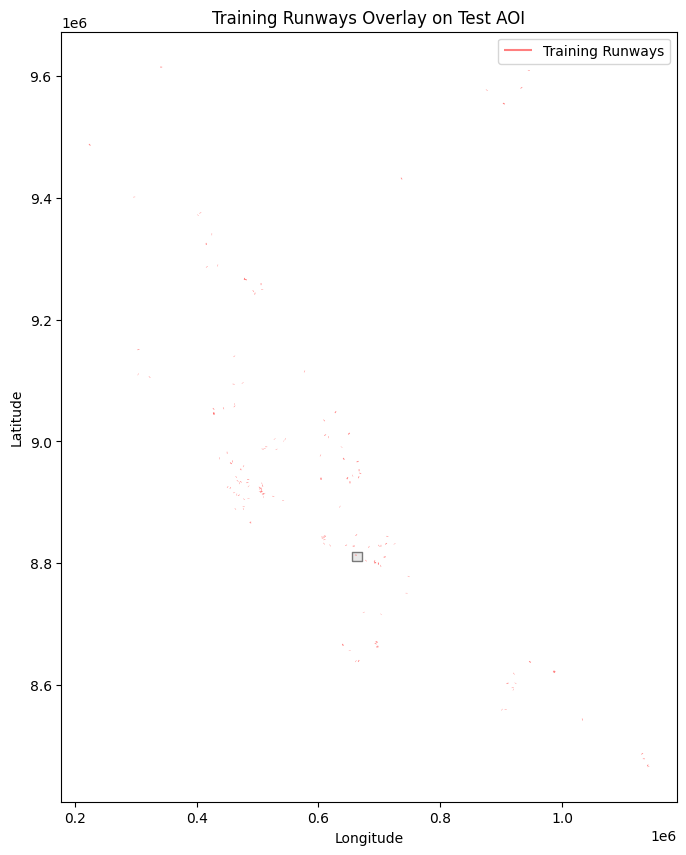


Number of Training Runways Intersecting aoi_2021_04.shp: 1

=== Summary ===

- **Training Data**: Contains polygons of known clandestine runways with attributes such as year of detection. Used to train the detection model.
- **Test AOIs**: Define areas where the model needs to detect potential runways for specified years.
- **Submission CSVs**:
    - `input.csv`: Labeled tile data for training/validation.
    - `SampleSubmission.csv`: Template showing the required submission format with a large number of rows.
    
**Relationships**:
- Train the model using training shapefiles and input.csv.
- Apply the model to test AOIs to predict runways.
- Generate a reduced submission file (~200,000 rows) based on predictions, focusing on detected runways and their buffer regions.



In [47]:
# ============================================
# GeoAI Amazon Basin Secret Runway Detection
# Data Inspection Script
# ============================================

# ----------------------------
# 1. Environment Setup
# ----------------------------

# Install required libraries (Uncomment if running for the first time)
# !pip install geopandas matplotlib pandas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# ----------------------------
# 2. Inspecting Training Data
# ----------------------------

# a. Define the Path to the Training Shapefile
training_shapefile_path = os.path.join(
    'pac_2024_training', 'pac_2024_training.shp')

if not os.path.exists(training_shapefile_path):
    print(f"Training shapefile not found at: {training_shapefile_path}")
    sys.exit(1)

# b. Load the Training Shapefile
training_data = gpd.read_file(training_shapefile_path)
print("Training Data Loaded Successfully!")

# c. Inspect the First Few Rows
print("\nFirst Five Rows of Training Data:")
print(training_data.head())

# d. Check Data Structure and CRS
print("\nTraining Data Information:")
print(training_data.info())

print("\nTraining Data CRS:")
print(training_data.crs)

# e. Explore Attribute Columns
print("\nTraining Data Columns:")
print(training_data.columns)

if 'year' in training_data.columns:
    print("\nYear of Detection Counts:")
    print(training_data['year'].value_counts())
else:
    print("\nNo 'year' column found in training data.")

# ----------------------------
# 3. Inspecting Test AOIs
# ----------------------------

# a. List All Test Shapefiles
test_shapefiles_dir = os.path.join('shp_test_AOIs', 'shp')

if not os.path.isdir(test_shapefiles_dir):
    print(f"Test shapefiles directory not found at: {test_shapefiles_dir}")
    sys.exit(1)

test_shapefiles = [f for f in os.listdir(
    test_shapefiles_dir) if f.endswith('.shp')]

print(f"\nFound {len(test_shapefiles)} Test Shapefiles:")
for shp in test_shapefiles:
    print(f"- {shp}")

# b. Load and Inspect a Specific Test Shapefile
if not test_shapefiles:
    print("No test shapefiles found to inspect.")
    sys.exit(1)

test_shapefile_name = test_shapefiles[0]
test_shapefile_path = os.path.join(test_shapefiles_dir, test_shapefile_name)

test_data = gpd.read_file(test_shapefile_path)
print(f"\nTest AOI Data Loaded Successfully: {test_shapefile_name}")

# c. Inspect the Test AOI Data
print("\nFirst Five Rows of Test AOI Data:")
print(test_data.head())

print("\nTest AOI Data Information:")
print(test_data.info())

print("\nTest AOI Data CRS:")
print(test_data.crs)


# e. Overlay Training Runways on Test AOI
if training_data.crs != test_data.crs:
    training_data_converted = training_data.to_crs(test_data.crs)
    print("\nConverted training data CRS to match test AOI CRS.")
else:
    training_data_converted = training_data

fig, ax = plt.subplots(figsize=(10, 10))
test_data.plot(ax=ax, color='lightgrey', edgecolor='black',
               alpha=0.5, label='Test AOI')
training_data_converted.plot(
    ax=ax, color='red', edgecolor='black', alpha=0.5, label='Training Runways')
plt.title('Training Runways Overlay on Test AOI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# f. Spatial Relationship Analysis
intersections = gpd.sjoin(training_data_converted,
                          test_data, how='inner', predicate='intersects')
print(
    f"\nNumber of Training Runways Intersecting {test_shapefile_name}: {len(intersections)}")

# ----------------------------
# 5. Summary and Relationships
# ----------------------------

print("\n=== Summary ===")
print("""
- **Training Data**: Contains polygons of known clandestine runways with attributes such as year of detection. Used to train the detection model.
- **Test AOIs**: Define areas where the model needs to detect potential runways for specified years.
- **Submission CSVs**:
    - `input.csv`: Labeled tile data for training/validation.
    - `SampleSubmission.csv`: Template showing the required submission format with a large number of rows.
    
**Relationships**:
- Train the model using training shapefiles and input.csv.
- Apply the model to test AOIs to predict runways.
- Generate a reduced submission file (~200,000 rows) based on predictions, focusing on detected runways and their buffer regions.
""")

=== Shapefile Information ===
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MINX      1 non-null      float64 
 1   MINY      1 non-null      float64 
 2   MAXX      1 non-null      float64 
 3   MAXY      1 non-null      float64 
 4   CNTX      1 non-null      float64 
 5   CNTY      1 non-null      float64 
 6   AREA      1 non-null      float64 
 7   PERIM     1 non-null      float64 
 8   HEIGHT    1 non-null      float64 
 9   WIDTH     1 non-null      float64 
 10  geometry  1 non-null      geometry
dtypes: float64(10), geometry(1)
memory usage: 220.0 bytes
None

=== First Five Rows ===
            MINX          MINY           MAXX          MAXY           CNTX  \
0  655519.352317  8.803686e+06  670929.352317  8.818956e+06  663224.352317   

           CNTY         AREA    PERIM   HEIGHT    WIDTH  \
0  8.811321e+06  235310700.0  61360.

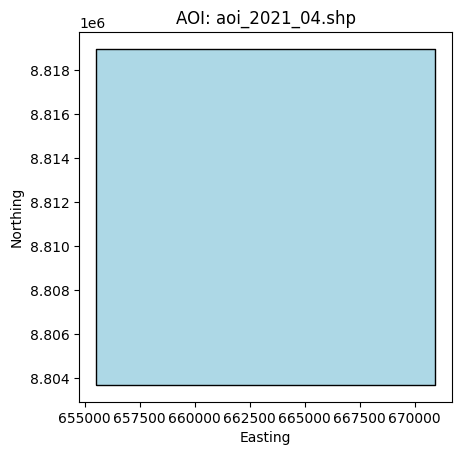

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your AOI shapefile
shapefile_path = 'shp_test_AOIs/shp/aoi_2021_04.shp'

# Load the shapefile
aoi = gpd.read_file(shapefile_path)

# Display basic information
print("=== Shapefile Information ===")
print(aoi.info())

# Display the first few rows
print("\n=== First Five Rows ===")
print(aoi.head())

# Print Coordinate Reference System (CRS)
print("\n=== Coordinate Reference System (CRS) ===")
print(aoi.crs)

# Plot the shapefile
aoi.plot(color='lightblue', edgecolor='black')
plt.title('AOI: aoi_2021_04.shp')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.show()

AOI Year: 2021, AOI Month: 03, Tile Row: 1047, Tile Column: 1231
Is the tile within the AOI? Yes


/tmp/ipykernel_892290/2478539209.py:105: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  is_within = tile_gdf.within(aoi_gdf.unary_union).iloc[0]
/tmp/ipykernel_892290/2478539209.py:164: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axes[0].legend()
/tmp/ipykernel_892290/2478539209.py:164: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


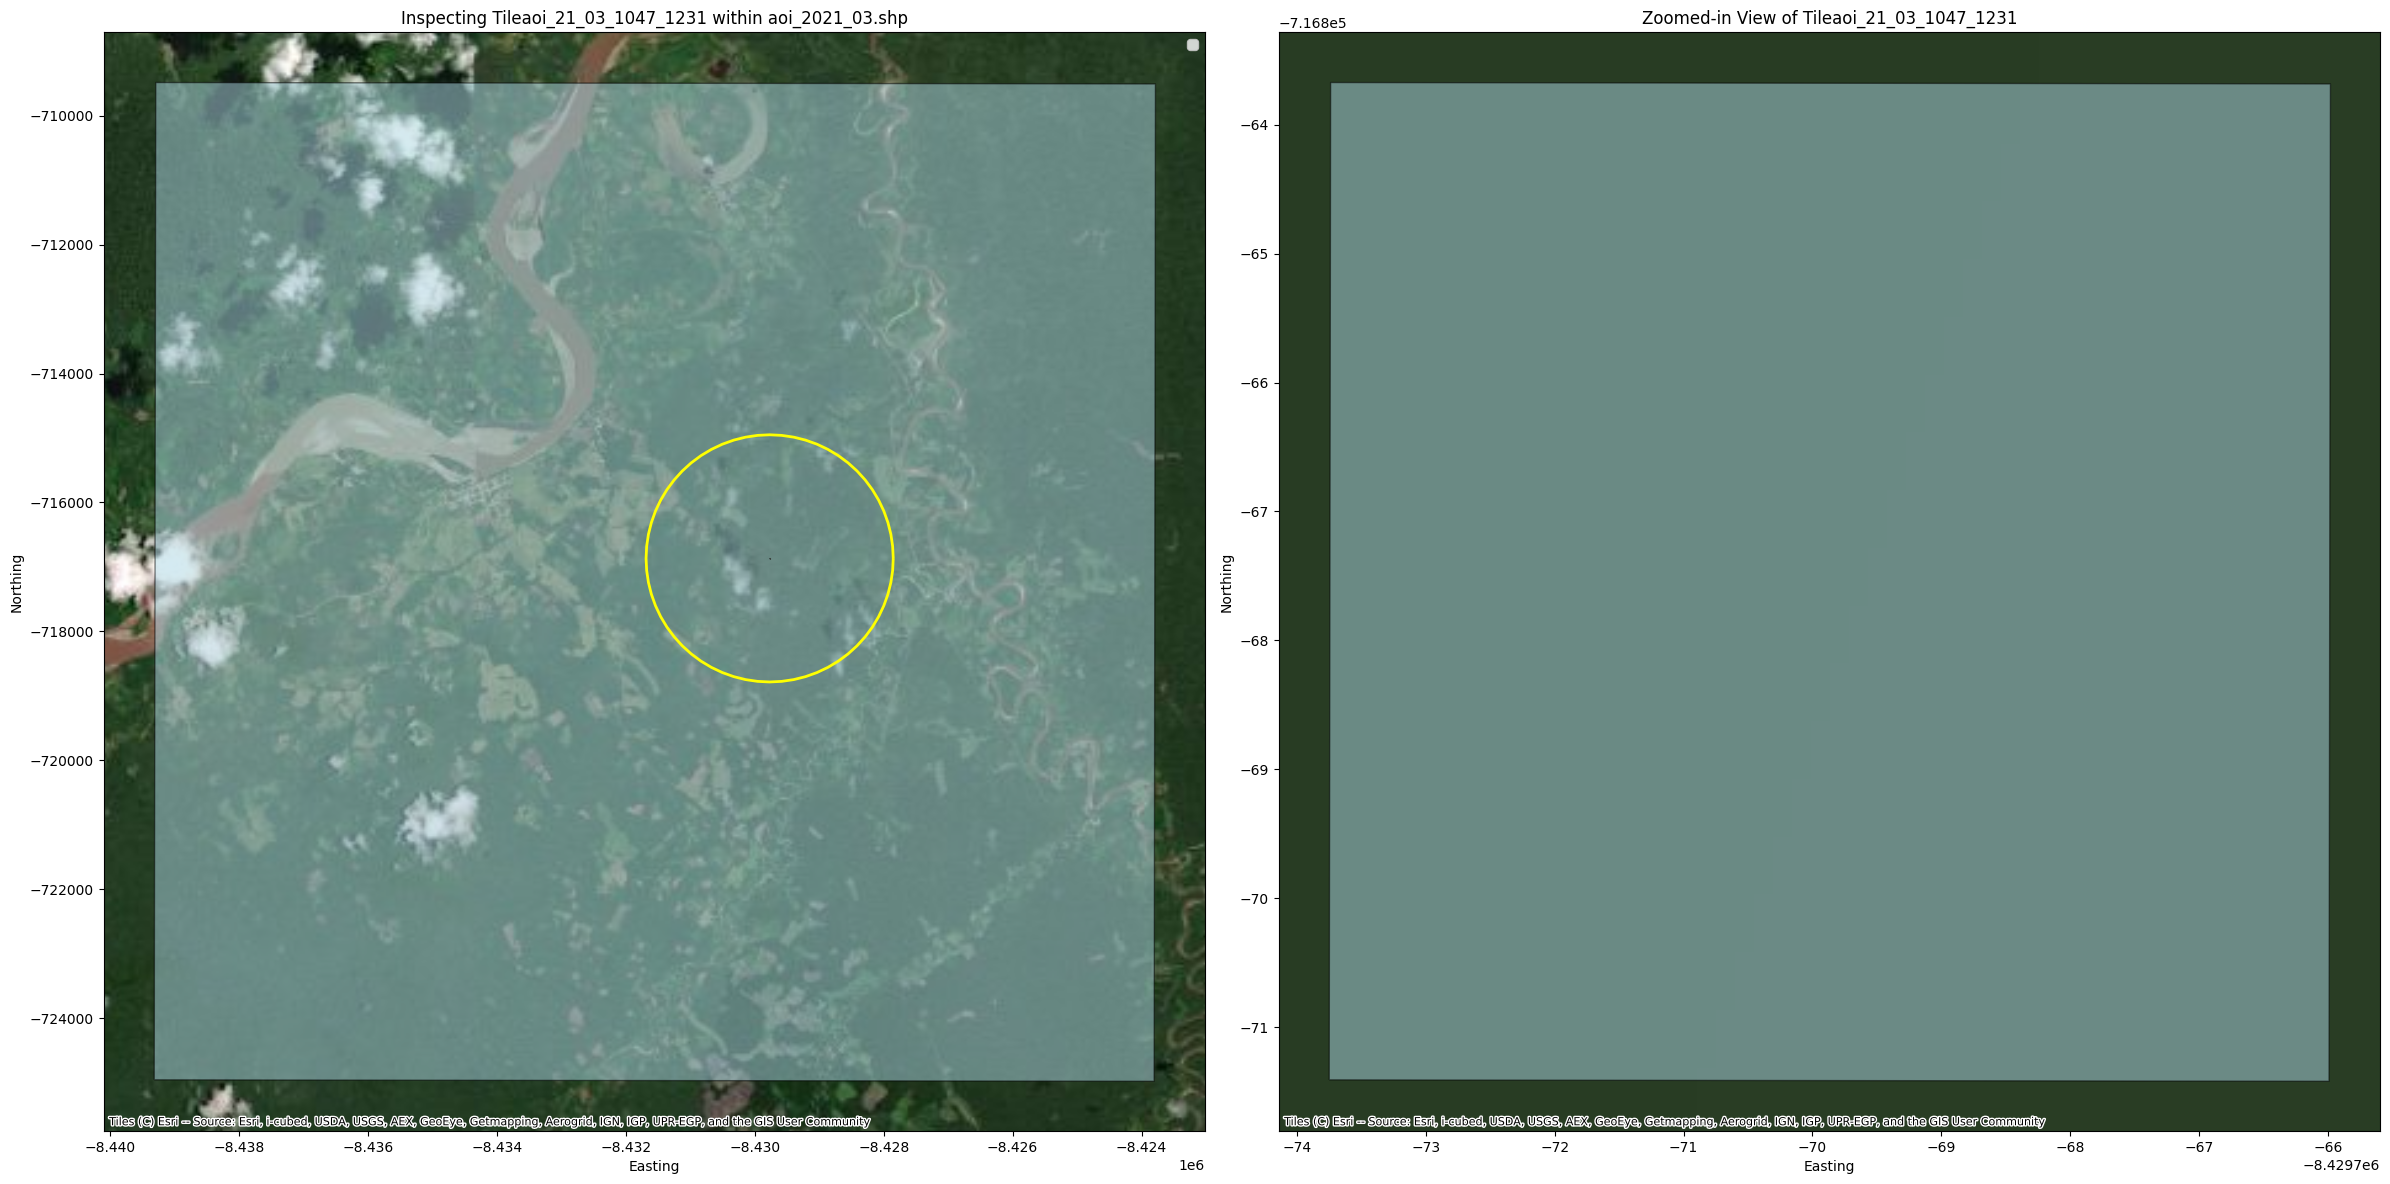

In [36]:
import geopandas as gpd
from shapely.geometry import Polygon, Point  # Imported Point for centroid
import matplotlib.pyplot as plt
import contextily as ctx
import re
import os


def parse_tile_identifier(tile_id):
    """
    Parses the tile identifier to extract AOI year, month, row, and column.

    Parameters:
    - tile_id (str): Tile identifier in the format 'Tileaoi_YY_MM_row_col'

    Returns:
    - year (str): Four-digit year
    - month (str): Two-digit month
    - row (int): Tile row index
    - col (int): Tile column index
    """
    pattern = r'Tileaoi_(\d{2})_(\d{2})_(\d+)_(\d+)'
    match = re.match(pattern, tile_id)
    if not match:
        raise ValueError(
            "Tile identifier does not match the expected format 'Tileaoi_YY_MM_row_col'.")
    yy, mm, row, col = match.groups()
    year = f"20{yy}"
    month = mm
    return year, month, int(row), int(col)


def calculate_tile_extent(aoi_bounds, row, col, total_rows, total_cols):
    """
    Calculates the spatial extent (bounding box) of a specific tile within the AOI.

    Parameters:
    - aoi_bounds (tuple): (minx, miny, maxx, maxy) of the AOI
    - row (int): Tile row index
    - col (int): Tile column index
    - total_rows (int): Total number of tile rows in the AOI
    - total_cols (int): Total number of tile columns in the AOI

    Returns:
    - tile_polygon (Polygon): Shapely Polygon of the tile's bounding box
    """
    minx, miny, maxx, maxy = aoi_bounds
    tile_width = (maxx - minx) / total_cols
    tile_height = (maxy - miny) / total_rows

    tile_minx = minx + (col - 1) * tile_width
    tile_maxx = minx + col * tile_width
    tile_miny = miny + (row - 1) * tile_height
    tile_maxy = miny + row * tile_height

    tile_polygon = Polygon([
        (tile_minx, tile_miny),
        (tile_minx, tile_maxy),
        (tile_maxx, tile_maxy),
        (tile_maxx, tile_miny),
        # (tile_minx, tile_miny)
    ])

    return tile_polygon


def inspect_tile(tile_id, shapefiles_dir, total_rows, total_cols):
    """
    Inspects a specific tile by plotting it within the corresponding AOI shapefile.

    Parameters:
    - tile_id (str): Tile identifier (e.g., 'Tileaoi_21_03_1047_1231')
    - shapefiles_dir (str): Directory containing AOI shapefiles
    - total_rows (int): Total number of tile rows in the AOI
    - total_cols (int): Total number of tile columns in the AOI
    """
    # Parse the tile identifier
    year, month, row, col = parse_tile_identifier(tile_id)
    print(
        f"AOI Year: {year}, AOI Month: {month}, Tile Row: {row}, Tile Column: {col}")

    # Determine the AOI shapefile path
    aoi_filename = f"aoi_{year}_{month}.shp"
    aoi_path = os.path.join(shapefiles_dir, aoi_filename)

    if not os.path.exists(aoi_path):
        raise FileNotFoundError(f"AOI shapefile not found: {aoi_path}")

    # Load the AOI shapefile
    aoi_gdf = gpd.read_file(aoi_path)
    aoi_bounds = aoi_gdf.total_bounds  # [minx, miny, maxx, maxy]

    # Calculate the tile's spatial extent
    tile_polygon = calculate_tile_extent(
        aoi_bounds, row, col, total_rows, total_cols)

    # Create a GeoDataFrame for the tile
    tile_gdf = gpd.GeoDataFrame([{'geometry': tile_polygon}], crs=aoi_gdf.crs)

    # Reproject to Web Mercator for basemap compatibility
    aoi_gdf = aoi_gdf.to_crs(epsg=3857)
    tile_gdf = tile_gdf.to_crs(epsg=3857)

    # Check if the tile is within the AOI
    is_within = tile_gdf.within(aoi_gdf.unary_union).iloc[0]
    print(f"Is the tile within the AOI? {'Yes' if is_within else 'No'}")

    # ----------------------------
    # Added: Create and Plot Circle around Tile
    # ----------------------------
    # Calculate AOI dimensions
    aoi_width = aoi_bounds[2] - aoi_bounds[0]
    aoi_height = aoi_bounds[3] - aoi_bounds[1]
    aoi_average = (aoi_width + aoi_height) / 2

    # Define circle radius as 1/8 of the AOI's average dimension
    circle_radius = aoi_average / 8

    # Get the centroid of the tile
    tile_centroid = tile_gdf.geometry.centroid.iloc[0]

    # Create a circular polygon around the centroid
    circle = tile_centroid.buffer(circle_radius)

    # Create a GeoDataFrame for the circle
    circle_gdf = gpd.GeoDataFrame([{'geometry': circle}], crs=aoi_gdf.crs)

    # ----------------------------
    # Added: Create and Plot Circle around Tile
    # ----------------------------
    # Calculate AOI dimensions
    aoi_width = aoi_bounds[2] - aoi_bounds[0]
    aoi_height = aoi_bounds[3] - aoi_bounds[1]
    aoi_average = (aoi_width + aoi_height) / 2

    # Define circle radius as 1/8 of the AOI's average dimension
    circle_radius = aoi_average / 8

    # Get the centroid of the tile
    tile_centroid = tile_gdf.geometry.centroid.iloc[0]

    # Create a circular polygon around the centroid
    circle = tile_centroid.buffer(circle_radius)

    # Create a GeoDataFrame for the circle
    circle_gdf = gpd.GeoDataFrame([{'geometry': circle}], crs=aoi_gdf.crs)

    # ----------------------------
    # Plot AOI, Tile, Circle, and Zoomed Tile
    # ----------------------------
    fig, axes = plt.subplots(1, 2, figsize=(24, 12))

    # Plot 1: Full AOI with Tile and Circle
    aoi_gdf.plot(ax=axes[0], color='lightblue',
                 edgecolor='black', label='AOI', alpha=0.5)
    if is_within:
        tile_gdf.plot(ax=axes[0], color='red',
                      edgecolor='black', alpha=0.5, label='Tile')
    else:
        tile_gdf.plot(ax=axes[0], color='gray', edgecolor='black',
                      alpha=0.5, label='Tile (Outside AOI)')
    circle_gdf.plot(ax=axes[0], facecolor='none',
                    edgecolor='yellow', linewidth=2, label='Tile Circle')
    ctx.add_basemap(axes[0], source=ctx.providers.Esri.WorldImagery, zoom=12)
    axes[0].set_title(f'Inspecting {tile_id} within {aoi_filename}')
    axes[0].set_xlabel('Easting')
    axes[0].set_ylabel('Northing')
    axes[0].legend()

    # Plot 2: Zoomed-in Tile
    tile_gdf.plot(ax=axes[1], color='lightblue',
                  edgecolor='black', alpha=0.5, label='Tile')
    # bounds = tile_polygon.bounds
    # padding_coef = 1
    # axes[1].set_xlim(bounds[0] - padding_coef * (bounds[2] - bounds[0]), bounds[2] + padding_coef * (bounds[2] - bounds[0]))
    # axes[1].set_ylim(bounds[1] - padding_coef * (bounds[3] - bounds[1]), bounds[3] + padding_coef * (bounds[3] - bounds[1]))
    ctx.add_basemap(
        axes[1],
        source=ctx.providers.Esri.WorldImagery,
        zoom=12)  # Higher zoom level for detail
    axes[1].set_title(f'Zoomed-in View of {tile_id}')
    axes[1].set_xlabel('Easting')
    axes[1].set_ylabel('Northing')

    plt.tight_layout()
    plt.show()

    return is_within

# ----------------------------
# Example Usage
# ----------------------------


if __name__ == "__main__":
    # Define the tile identifier you want to inspect
    tile_identifier = 'Tileaoi_21_03_1047_1231'  # Replace with your tile ID

    # Define the directory containing AOI shapefiles
    shapefiles_dir = 'shp_test_AOIs/shp'  # Adjust if different

    # Define the total number of rows and columns in the AOI grid
    # **Important:** Replace these with actual numbers based on your tiling system
    total_tile_rows = 2000  # Example value
    total_tile_cols = 2000  # Example value

    # Inspect the tile
    try:
        within_aoi = inspect_tile(
            tile_identifier, shapefiles_dir, total_tile_rows, total_tile_cols)
    except Exception as e:
        print(f"Error: {e}")

In [71]:
import geopandas as gpd

# Path to one of your AOI shapefiles
# Replace with the desired shapefile
aoi_shapefile = 'shp_test_AOIs/shp/aoi_2021_03.shp'

# Load the shapefile
aoi_gdf = gpd.read_file(aoi_shapefile)

# Inspect the first few rows and columns
print(aoi_gdf.head())
print(aoi_gdf.columns)
print(aoi_gdf)

            MINX          MINY           MAXX          MAXY           CNTX  \
0  410245.316569  9.281633e+06  425655.316569  9.296903e+06  417950.316569   

           CNTY         AREA    PERIM   HEIGHT    WIDTH  \
0  9.289268e+06  235310700.0  61360.0  15270.0  15410.0   

                                            geometry  
0  POLYGON ((410245.317 9281633.378, 410245.317 9...  
Index(['MINX', 'MINY', 'MAXX', 'MAXY', 'CNTX', 'CNTY', 'AREA', 'PERIM',
       'HEIGHT', 'WIDTH', 'geometry'],
      dtype='object')
            MINX          MINY           MAXX          MAXY           CNTX  \
0  410245.316569  9.281633e+06  425655.316569  9.296903e+06  417950.316569   

           CNTY         AREA    PERIM   HEIGHT    WIDTH  \
0  9.289268e+06  235310700.0  61360.0  15270.0  15410.0   

                                            geometry  
0  POLYGON ((410245.317 9281633.378, 410245.317 9...  


In [49]:
import geopandas as gpd
import os
import math
import pandas as pd

def lon_to_utm_zone(lon):
    """Calculate the UTM zone number from longitude, capped between 1 and 60."""
    zone = int((lon + 180) / 6) + 1
    zone = min(max(zone, 1), 60)
    return zone

def get_utm_crs(lat, lon):
    """Return the EPSG code for the UTM CRS based on latitude and longitude."""
    zone = lon_to_utm_zone(lon)
    if lat >= 0:
        epsg_code = 32600 + zone  # Northern hemisphere
    else:
        epsg_code = 32700 + zone  # Southern hemisphere
    return f'EPSG:{epsg_code}'

def calculate_aoi_metrics(shp_dir):
    """
    Calculate area, width, and height for each shapefile in the directory.

    Parameters:
    - shp_dir (str): Path to the directory containing shapefiles.

    Returns:
    - pd.DataFrame: DataFrame containing metrics for each AOI.
    """
    # List all .shp files in the directory
    shp_files = [f for f in os.listdir(shp_dir) if f.endswith('.shp')]

    # Initialize a list to store results
    results = []

    # Process each shapefile
    for shp_file in shp_files:
        # Full path to the shapefile
        shp_path = os.path.join(shp_dir, shp_file)
        
        try:
            # Read the shapefile using GeoPandas
            gdf = gpd.read_file(shp_path)
        except Exception as e:
            print(f"Error reading {shp_file}: {e}")
            continue

        # Ensure the GeoDataFrame has a CRS
        if gdf.crs is None:
            print(f"Shapefile {shp_file} has no CRS. Skipping.")
            continue

        # Reproject to WGS84 if not already
        if gdf.crs.to_string() != 'EPSG:4326':
            gdf = gdf.to_crs('EPSG:4326')

        # Select the first geometry (assuming one AOI per shapefile)
        try:
            runway = gdf.iloc[0]
            geometry = runway.geometry
        except Exception as e:
            print(f"Error processing geometry in {shp_file}: {e}")
            continue

        # Calculate centroid
        centroid = geometry.centroid
        lon, lat = centroid.x, centroid.y

        # Get appropriate UTM CRS
        utm_crs = get_utm_crs(lat, lon)

        try:
            # Reproject to UTM CRS for accurate measurements
            gdf_projected = gdf.to_crs(utm_crs)
        except Exception as e:
            print(f"Error reprojecting {shp_file} to {utm_crs}: {e}")
            continue

        # Calculate area in square meters
        try:
            area = gdf_projected['geometry'].area.iloc[0]
        except Exception as e:
            print(f"Error calculating area for {shp_file}: {e}")
            area = None

        # Get the bounding box dimensions (minx, miny, maxx, maxy)
        try:
            minx, miny, maxx, maxy = gdf_projected.total_bounds
            width = maxx - minx  # Width in meters
            height = maxy - miny  # Height in meters
        except Exception as e:
            print(f"Error calculating dimensions for {shp_file}: {e}")
            width = height = None

        # Append the results
        results.append({
            'Shapefile': shp_file,
            'Area (sq m)': round(area, 2) if area else None,
            'Width (m)': round(width, 2) if width else None,
            'Height (m)': round(height, 2) if height else None
        })

    # Create a DataFrame from the results
    df = pd.DataFrame(results)
    return df

if __name__ == "__main__":
    # Directory containing the shapefiles
    shp_dir = 'shp_test_AOIs/shp'  # Update this path if necessary

    # Calculate metrics
    metrics_df = calculate_aoi_metrics(shp_dir)

    # Display the results
    print(metrics_df)

    # Optionally, save to a CSV file
    metrics_df.to_csv('aoi_metrics.csv', index=False)
    print("Metrics have been saved to 'aoi_metrics.csv'.")


          Shapefile  Area (sq m)  Width (m)  Height (m)
0   aoi_2021_04.shp  235310700.0    15410.0     15270.0
1   aoi_2022_01.shp  235310700.0    15410.0     15270.0
2   aoi_2024_01.shp  235310700.0    15410.0     15270.0
3   aoi_2020_02.shp  235310700.0    15410.0     15270.0
4   aoi_2021_01.shp  235002500.0    15410.0     15250.0
5   aoi_2020_03.shp  235310700.0    15410.0     15270.0
6   aoi_2020_01.shp  235310700.0    15410.0     15270.0
7   aoi_2022_02.shp  235310700.0    15410.0     15270.0
8   aoi_2023_01.shp  235310700.0    15410.0     15270.0
9   aoi_2021_03.shp  235310700.0    15410.0     15270.0
10  aoi_2021_02.shp  235002500.0    15410.0     15250.0
Metrics have been saved to 'aoi_metrics.csv'.
